# <span style="color:green"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:red"><center>Análisis en componentes principales</center></span>

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co






# **<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## <span style="color:blue">Asistentes</span>

1. Jessica López Mejia, jelopezme@unal.edu.co

## **Contenido**

* [Introducción](#Introducción)
* [Geometría de una variable](#Geometría-de-una-variable)
* [Geometría de dos variables](#Geometría-de-dos-variables)
* [Objetivos del análisis en componentes principales](#Objetivos-del-análisis-en-componentes-principales)
* [Ejemplo café y notación](#Ejemplo-café-y-notación)
* [Nube de individuos](#Nube-de-individuos)
* [Nube de variables](#Nube-de-variables)
* [Relaciones entre los espacios de individuos y de variables](#Relaciones-entre-los-espacios-de-individuos-y-de-variables)
* [Ayudas para la interpretación](#Ayudas-para-la-interpretación)
* [Proyección de elementos suplementarios o ilustrativos](Proyección-de-elementos-suplementarios-o-ilustrativos)

Fuente: Pardo C. E. (2020). Estadística descriptiva multivariada. Universidad Nacional de Colombia Sede Bogotá. Facultad de Ciencias. [PDF](https://bit.ly/3mD9rEY)

# **Introducción**

El análisis en componentes principales (ACP) es muy conocido en la Ciencia de Datos como una técnica de reducción de dimensión, pero es mucho más que eso. Si se aborda desde un punto de vista geométrico, es una técnica poderosa para la visualización de datos.  Hacemos uso del R en primera instancia para entender los métodos y luego para llevarlos a cabo en la práctica. En este cuaderno introducimos el ACP como se conoce en la mayoría de los ámbitos y que podemos llamar ACP canónico. 

Antes de abordar el ACP repasemos algunos aspectos de representación geométrica de $n$ puntos en la recta real ($\Re$) y de $n$ puntos en el plano ($\Re^2$), utilizando dos ejemplos sencillos. Las demás secciones presentan el ACP con un "ejemplo de juguete" en $\Re^3$ y ejemplo de aplicación pequeño.

Para ver con mayor detalle se puede consultar el libro *Estadística descriptiva multivariada*, disponible en [PDF](https://bit.ly/3mD9rEY) en la página Web de la Facultad de Ciencias, Universidad Nacional de Colombia Sede Bogotá, dónde además, se encuentran unas cuantas referencias para profundizar en el método. 

[Volver al inicio](#Contenido)

## **Geometría de una variable**

Se tiene la variable $Y$, con los valores:

In [1]:
Y <- c(9,7,8,3,1,3,4,7,2,6)
cat("Y = [",Y,"]")

Y = [ 9 7 8 3 1 3 4 7 2 6 ]

La media de $Y$ es el centro de gravedad de los 10 puntos, si se consideran, por ejemplo como esferas sobre una barra de peso despreciable:
$$
g = \sum_{i=1}^{10} p_i y_i \  \ \ con \ \ \sum_{i=1}^{10} p_i =1
$$
El caso particular de $p_i = \dfrac{1}{n}$ para todo $i$, el que calcula R con la función
*mean{base}*
$$
\bar{Y} = \frac{1}{n} \sum_{i=1}^{10} p_i y_i
$$
Llamaremos $g$ a la media de $Y$:

In [2]:
g=mean(Y) 
cat("media de Y = g = ",g)

media de Y = g =  5

Sea $X = Y-g$:

In [3]:
X = Y-g
cat("X = [",X,"]")

X = [ 4 2 3 -2 -4 -2 -1 2 -3 1 ]

Representación de $Y$ y $X$ en la recta real:

<figure> 
<img src="../Imagenes/geometriaY.png"  width="480" height="480" align="left"/> 
</figure>

Nótese que al restar la media ($Y-g$) el cero se ha trasladado a la media (cinco). Las tranlaciones no modifican la varianza entonces $Y$ y $X$ tienen igual varianza, pero como $X$ está centrada, entonces en el cálculo de la varianza se suman los cuadrados de $X$, la varianza es entonces el momento de de inercia de los puntos con respecto al centro de gravedad.

Sea $V$, la varianza de $Y$ (igual a la de $X$), entonces $V =\dfrac{1}{10} \sum_\limits{i=1}^{10} x_i^2$

Por otro lado, el momento de inercia es:
$$
V = \sum_{i=1}^{10} p_i d^2(y_i,g) = \sum_{i=1}^{10} p_i d^2(x_i,0) = \frac{1}{10} \sum_{i=1}^{10}  x_i^2
$$
En Estadística le decimos *Inercia* al momento de inercia respecto al centro de gravedad, de la física. Cuando nos referimos a una sola variable le decimos *varianza*.

In [4]:
V=1/10*sum(X*X)
cat("Varianza de X = ",V)

Varianza de X =  6.8

La función *var{stats}* de R calcula la varianza muestral (divide por $n-1$ = 9) entonces se debe multiplivar por $\dfrac{n-1}{n}$, en este ejemplo por $9/10)$

In [5]:
9/10*var(Y)

[1] 6.8

[Volver al inicio](#Contenido)

## **Geometría de dos variables**

Sea la variable $Y_1 = Y$ y $Y_2$ con los valores:


In [6]:
Y1=Y
Y2=c(9,13,6,1,5,11,4,3,8,10)
cat("Y2 = [",Y2,"]")

Y2 = [ 9 13 6 1 5 11 4 3 8 10 ]

Ahora llamamos **Y** la tabla de datos (matriz) de $10$ filas y $2$ columnas, por comodidad se muestra transpuesta:

In [7]:
Y = cbind(Y1,Y2)
rownames(Y)=1:10
t(Y)

,1,2,3,4,5,6,7,8,9,10
Y1,9,7,8,3,1,3,4,7,2,6
Y2,9,13,6,1,5,11,4,3,8,10


Cada columna de $\mathbf{Y}^T$ es un vector en $\Re^2$, que notaremos por $\mathbf{y}_i \ \ i =1,2,\cdots,10$ y el centro de gravedad es el vector formado por las dos medias:
$$
\mathbf{g} = \frac{1}{n}\sum_{i=1}^{10}  \mathbf{y}_i
$$

In [8]:
g=colMeans(Y)
cat("Centro de gravedad = g = ",g)

Centro de gravedad = g =  5 7

Representación de los puntos en el plano, junto con su centro de gravedad:

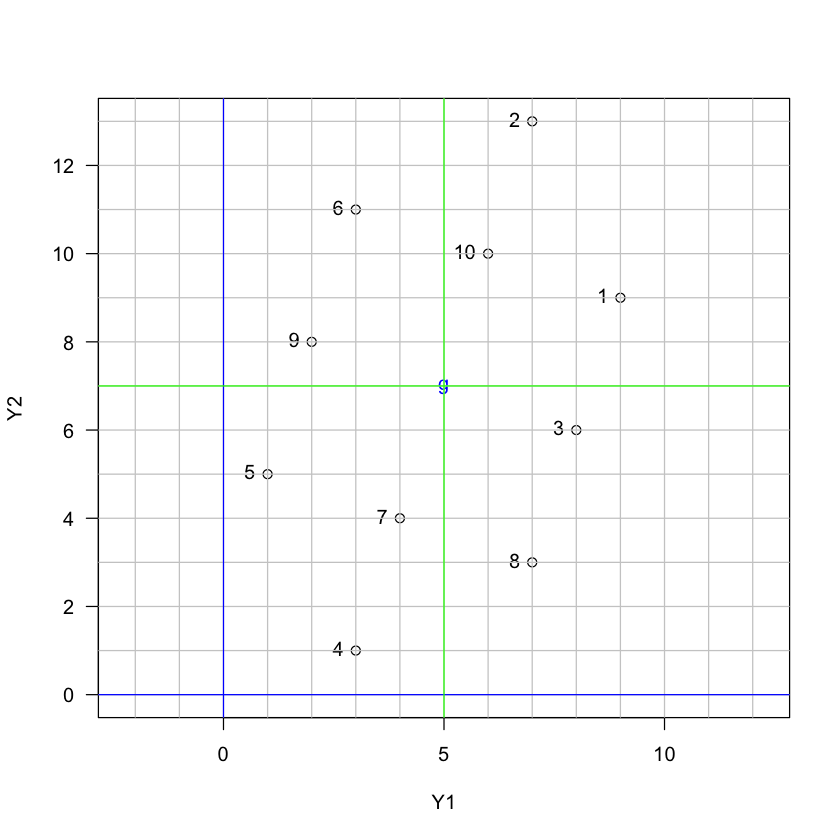

In [9]:
plot(Y,las=1,asp=1,xlim=c(0,10),ylim=c(0,13))
text(Y,labels=rownames(Y),pos=2)
text(g[1],g[2],col="blue",labels="g")
abline(v=-2:12,h=0:15,col="gray80")
abline(v=0,h=0,col="blue")
abline(v=5,h=7,col="green")


Ahora centramos los puntos (poner el cero en el centro de gravedad):
$$
\mathbf{x}_i = \mathbf{y}_i - \mathbf{g}
$$

Diagrama de dispersión transladando el origen al centro de gravedad (centrado)

In [10]:
X = matrix(NA,10,2)
for (i in 1:10) X[i,] = Y[i,] - g
colnames(X) = paste("X",1:2,sep="")
rownames(X) = 1:10
t(X)
# suma 0 porque están centrados
cat("Suma = ",colSums(X))


,1,2,3,4,5,6,7,8,9,10
X1,4,2,3,-2,-4,-2,-1,2,-3,1
X2,2,6,-1,-6,-2,4,-3,-4,1,3


Suma =  0 0

Plano de los puntos centrados:

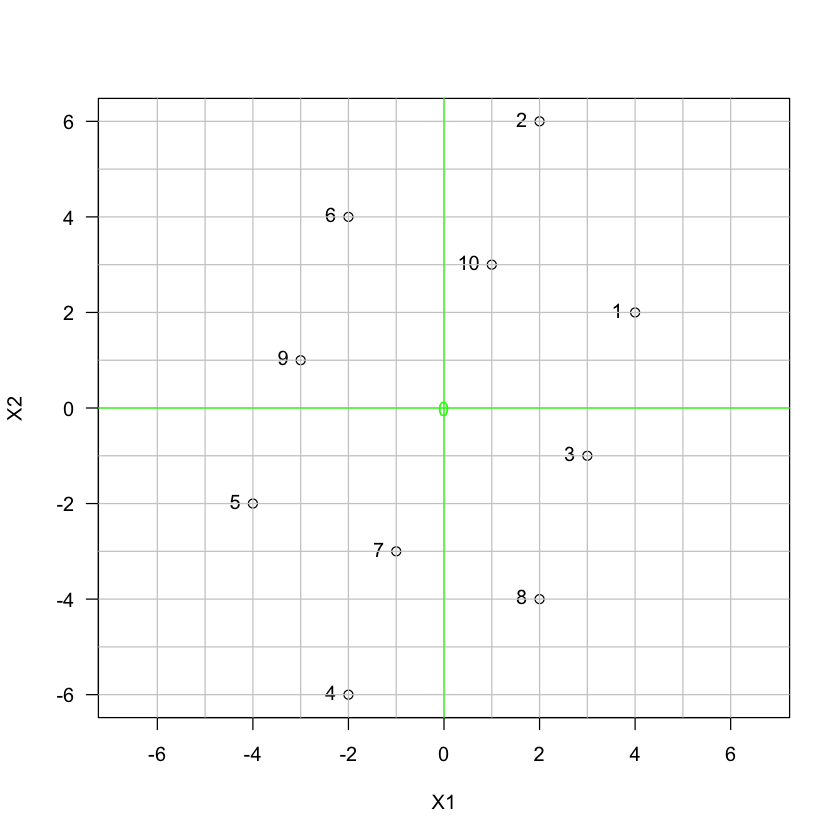

In [11]:
plot(X,las=1,asp=1)
text(X,labels=rownames(X),pos=2)
abline(v=-6:6,h=-6:6,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")


Ahora busquemos el eje en la dirección más alargada de la nube de puntos. A ojo se ve que es la linea que pasa por el origen y es de pendiente 3 y dibujemos también la que pasa por el origen y es de pendiente -1/3:

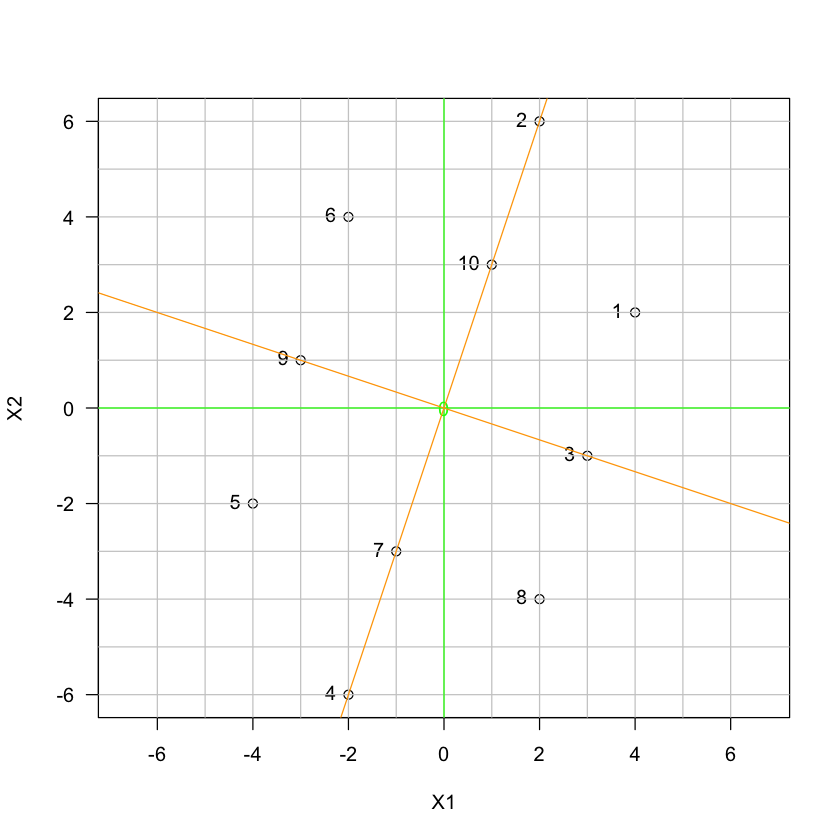

In [12]:
plot(X,las=1,asp=1)
text(X,labels=rownames(X),pos=2)
abline(v=-6:6,h=-6:6,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")
# en la dirección más alargada
abline(0,3,col="orange")
# eje perpendicular
abline(0,-1/3,col="orange")

Tomemos como vector director el punto 10 de coordenadas $[1 \ 3]^T$, calculemos su norma y obtengamos $\mathbf{u}_1$, de norma 1:

In [13]:
t = c(1,3)
nor.t=sqrt(sum(t*t))
cat("\nNorma de t = ",round(nor.t,2))
u1 = t/nor.t
cat("\nu1 = ",round(u1,2))
u2 = c(-u1[2],u1[1])
cat("\nu2 = ",round(u2,2))       


Norma de t =  3.16
u1 =  0.32 0.95
u2 =  -0.95 0.32

La recta generado por $\mathbf{u}_1$, la llamamos $F_1$ y  la generada por $\mathbf{u}_2$, $F_2$.
Ahora tenemos que encontrar las proyecciones de los 10 puntos sobre los ejes $F_1$ y $F_2$. Si hacemos la gráfica en papel cuadriculado podemos medir las proyecciones con una regla. Sin embargo podemos hacerlo con observación geométrica:

- El punto 10 está sobre $F_1$ y tiene norma 3.16 (redondeada a dos decimales) $\rightarrow$ la coordena de 10 sobre $F_1$ es 3.16. 
- Los puntos 1 y 6 tienen la misma coordenada de 10. 
- El punto 7 es de la misma longitud de 10, pero tiene sentido opuesto, entonces su coordenada es -3.16, igual que la de los puntos 5 y 8, 
- los puntos 3 y 6 se proyectan en 0, los puntos 2 y 4 tienen 2 veces la longitud de 10 y 7; 

Entonces las proyecciones sobre $F_1$ son:


In [14]:
F1 =c(3.16,6.32,0,-6.32,-3.16,3.16,-3.16,-3.16,0,3.16)
sum(F1)
F2 = c(-3.16,0,-3.16,0,3.16,3.16,0,-3.16,3.16,0)
sum(F2)

[1] 0

[1] 0

Llamemos $\mathbf{F}$ la tabla de coordenadas sobre los nuevos ejes y hagamos el plano pero con $F_1$ como eje horizontal y $F_2$ como vertical:


,1,2,3,4,5,6,7,8,9,10
F1,3.16,6.32,0.00,-6.32,-3.16,3.16,-3.16,-3.16,0.00,3.16
F2,-3.16,0.00,-3.16,0.00,3.16,3.16,0.00,-3.16,3.16,0.00


,u1,u2
X1,0.32,-0.95
X2,0.95,0.32


Pendiente X1 =  -3

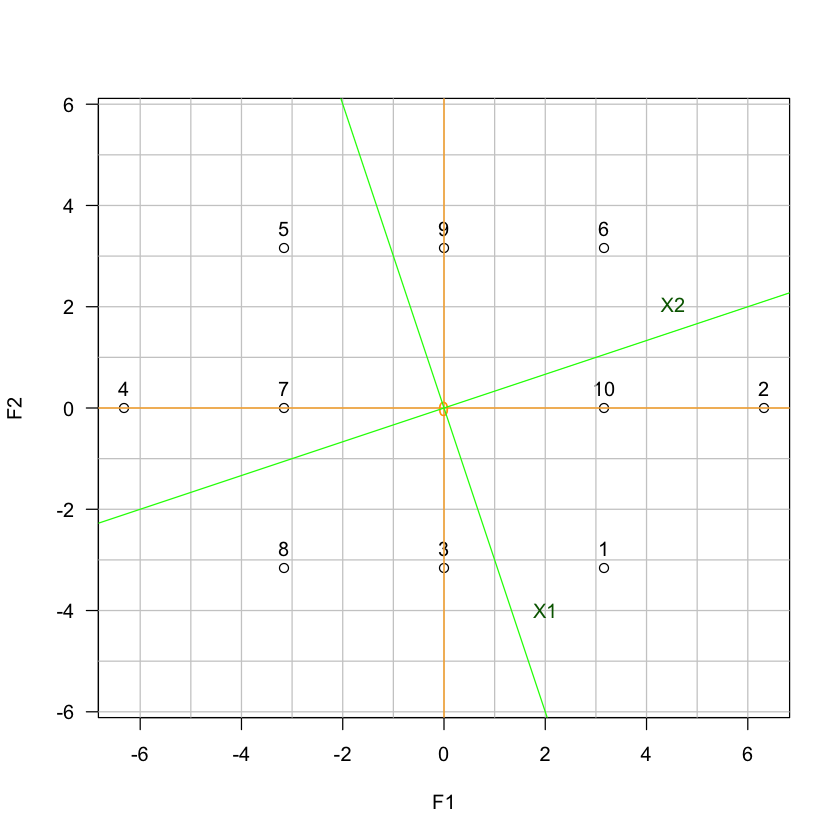

In [15]:
F =cbind(F1,F2)
colnames(F)=c("F1","F2")
rownames(F)=1:10
t(F)
plot(F,las=1,asp=1)
text(F,labels=rownames(F),pos=3)
abline(v=-6:6,h=-6:6,col="gray80")
abline(v=0,h=0,col="orange")
text(0,0,"0",col="orange")
# antiguos ejes sea U:
U=cbind(u1,u2)
rownames(U)=c("X1","X2")
round(U,2)
# la pendiente del antiguo eje X1 es
m1=U[1,2]/U[1,1]
cat("Pendiente X1 = ",m1)
abline(0,m1,col="green")
text(2,-4,"X1",col="darkgreen")
# X2
abline(0,-1/m1,col="green")
text(5,2,"X2",col="darkgreen",pos=2)

Pimero rotamos los ejes: nuevos $F_1$ y $F_2$ y luego la nube de puntos.

Suma de cuadrados y productos cruzados de **X** (**F**) y trazas:

In [16]:
SS.X = t(X)%*%X
SS.X
sum(diag(SS.X))
SS.F =t(F)%*%F
round(SS.F,1)
round(sum(diag(SS.F)),1)

,X1,X2
X1,68,24
X2,24,132


[1] 200

,F1,F2
F1,139.8,0.0
F2,0.0,59.9


[1] 199.7

Los nuevos ejes no están correlacionados.

Los valores y vectores propios dan la solución a esta rotación:

In [17]:
eigen(SS.X)

eigen() decomposition
$values
[1] 140  60

$vectors
          [,1]       [,2]
[1,] 0.3162278 -0.9486833
[2,] 0.9486833  0.3162278


In [18]:
U
round(diag(SS.F),1)

,u1,u2
X1,0.3162278,-0.9486833
X2,0.9486833,0.3162278


F1    F2 
139.8  59.9

No son iguales porque se usaron valores redondeados de **F** para calcular $SS.F$. Corrigiendo ahora:

In [19]:
SS.F=diag(eigen(SS.X)$values)
SS.F

140,0
0,60


Lo que se hizo en el plano fue una rotación de los ejes, lo que también en un cambio de base, porque ahora los puntos se expresan como combinaciones lineales de los vectores propios, es decir que la nueva base es:
$$
B = \{\mathbf{u}_1, \mathbf{u}_2\} 
$$

Si llamamos $\mathbf{A}$ la matriz y transformación lineal de rotación, entonces $\mathbf{A} = \mathbf{U}^T $ y la matriz $\mathbf{U} = [\mathbf{u}_1 \ \ \mathbf{u}_2]$

In [20]:
A = t(U)
A


,X1,X2
u1,0.3162278,0.9486833
u2,-0.9486833,0.3162278


Entonces la transformación lineal es:

$$
\Re^2 \xrightarrow{\ \ \ \ \ \ \mathbf{A} \ \ \ \ \ \ } \Re^2
$$

$$
\mathbf{x}_i \to \mathbf{A}\mathbf{x}_i
$$

Las dos columas de  $\mathbf{A}$  son las coordenadas de los *antiguos ejes unitarios* vectores que generan los ejes $X_1$ y $X=2$ para verlos en el plano rotado: eje horizontal $F_1$ y eje vertical $F_2$. 

El ángulo de rotación de los ejes es,en grados:

In [21]:
acos(A[1,1])*180/pi

[1] 71.56505

[Volver al inicio](#Contenido)

### Representación geométrica de las dos variables centradas $X_1$ y $X_2$

Las dos variables también tienen una representación geométrica, en el caso del ejemplo, en $\Re^{10}$, en este casos los ejes son las 10 filas. Las variables se suelen representar por flechas que parten del origen. No podemos ver su representación en en $\Re^{10}$ pero si en en $\Re^{2}$, sobre los nuevos ejes del espacio de las variables ($\Re^{2}$ subespacio de $\Re^{10}$. Veremos más adelante que las coordenadas de las variables $G_1$ y $G_2$, se pueden obtener de los valores y vectores propios del espacio de los individuos mediante:

$$
G_1 = \sqrt{\lambda_1}\mathbf{u}_1 \ \ \ y \ \ \ G_2 = \sqrt{\lambda_2} \mathbf{u}_2
$$


In [22]:
X

,X1,X2
1,4,2
2,2,6
3,3,-1
4,-2,-6
5,-4,-2
6,-2,4
7,-1,-3
8,2,-4
9,-3,1
10,1,3


Cálculo de las coordenadas de las variables y gráfica:

,G1,G2
X1,3.741657,-7.348469
X2,11.224972,2.449490


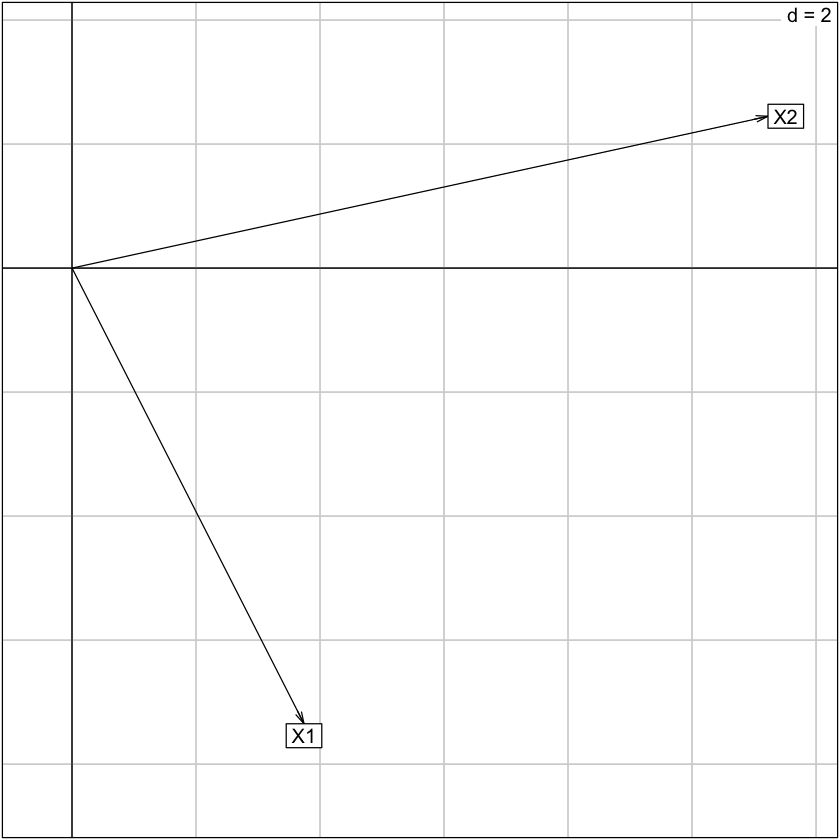

In [23]:
G1 = sqrt(140)*u1
G2 = sqrt(60)*u2
G = cbind(G1,G2)
rownames(G) =c("X1","X2")
G
library(ade4)
s.arrow(G)

[Volver al inicio](#Contenido)

# **Objetivos del análisis en componentes principales**

La entrada a un procedimiento de ACP es una tabla de $n$ filas y $p$ columnas. Las filas resperesntan las unidades estadísticas objeto del estudio, que se denominan *individuos* y las columnas variables continuas que se observan o miden sobre los individuos. Los objetivos principales del ACP son:

1. Comparar los individuos entre si
2. Describir las relaciones entre las variables
3. Reducir la dimensión de la representación

La tabla de datos tiene dos representaciones geométricas: los $n$ vectores fila en $Re^p$ (*nube de indiviuos*), en la cual se comparan los individuos; y $p$ vectores columna representados en $\Re^n$ (*nube de variables*), donde se describen las relaciones entre las variables.  

<figure> 
<img src="../Imagenes/esquemaTabla.png"  width="240" height="240" align="left"/> 
</figure>

[Volver al inicio](#Contenido)

# **Ejemplo café y notación**

Para entender el ACP  utilizamos un ejemplo muy pequeño, utilizando la tabla de datos *cafe*, dispoble en el paqute *FactoClass*. Es el resultado de un experimento realizado en el Laboratorio de Investigaciones Químicas del Café.

El experimento considera 3 factores:

- Agregado (sin maíz, cebada)
- Porcentaje del agregado (20\% y 40\%)
- Grado de tostación (clara y oscura)

Se producen  "libras de café" tostado y molido para los 10 tratamientos del experimento y con ellas se preparan tazas de café que se someten a mediciones físicas químicas y de degustación. El ejemplo de esta sección se utilizan solo las tres variables físicas, para visualizar la geometría del ACP. La tabla de datos de 10 filas y 3 columnas la definimos como **Y**.

In [24]:
# carga de FactoClass y definición de Y
library(FactoClass)

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



In [25]:
# definición de Y
data(cafe)
Y<-cafe[1:10,1:3]
Y

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36


La identificación de las filas (cafés, individuos) es nemotécnica y nos informa del respectivo tratamiento. Por ejemplo ExCl, significa café excelso (sin contaminación) y de tostación clara, C40M significa tostación clara contaminado con 40% de maíz.

[Volver al inicio](#Contenido)

# Nube de individuos 

En nube de los $n$ individuos en el espacio de las filas, cada fila ($i$ de **Y**, $y_i^T$  se representa como un punto en $\Re^p$. Los $p$ ejes son las variables El conjunto de puntos de denomina *nube de individuos* y se nota $N_n$. El centro de gravedad de la nube de puntos es:

$$
\mathbf{g}= \sum_{i=1}^{n} p_i  \mathbf{y}_i \qquad si \quad p_i = \frac{1}{n}\qquad  \mathbf{g} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{y}_i
$$

#### Representación de la nube en $3D$, junto con su centro de gravedad.

,Color,DA,EA
,<dbl>,<dbl>,<dbl>
C40M,361.0,481.30,41.0
ExOs,186.0,346.60,28.0
O20C,210.0,368.70,35.0
O20M,226.0,368.70,36.0
g,276.7,401.16,35.5


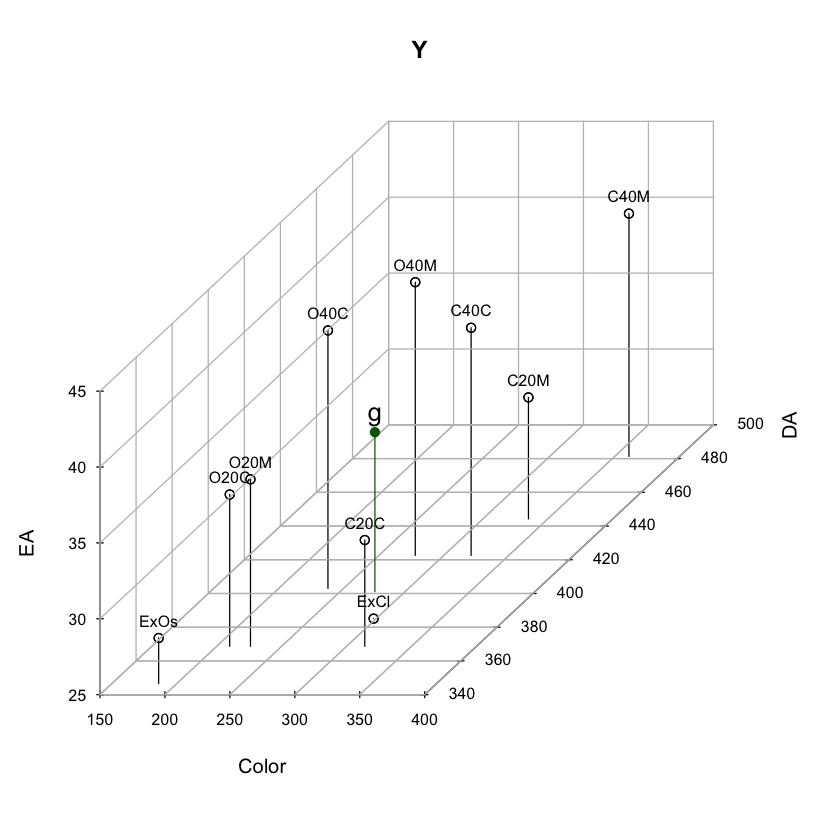

In [26]:
par(las=1); # grafica;
Y3D<-scatterplot3d(Y,main="Y",type="h",color="black",box=FALSE,las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="black",pos=3); 
# poner el centro de gravedad en la gráfica
g <- colMeans(Y) 
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="black",
     cex=1.3);
rbind(Y[c("C40M","ExOs","O20C","O20M"),],g=g)-> sel
sel

#### Gráfica 3D para rotar. No ejecute aquí el siguiente código. Cópielo y ejecútelo en la consola de R

In [38]:
##=======================================
### Elimine la prima fila de comentarios (#) y
### ejecute este código en la consola de R
##==============================
#library(FactoClass)
#data(cafe)
#Y<-cafe[1:10,1:3]
#Y
#library(rgl)
#plot3d(Y)
#grid3d(c("x", "y+", "z"))
#text3d(Y, texts=row.names(Y))
#g<-colMeans(Y)
#text3d(g,texts="g",col="red")
##========================================

#### **Centrado de la nube de puntos**
Los ejes se trasladan al centro de gravedad, restando a cada vector individuo el centro de gravedad:
$$
\mathbf{y_C}_i = \mathbf{y}_i - \mathbf{g}
$$

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C,g
Color,21.30,84.30,44.30,58.30,37.30,-90.70,1.30,-38.70,-50.70,-66.70,276.70
DA,-16.06,80.14,21.44,43.14,-32.46,-54.56,21.44,1.84,-32.46,-32.46,401.16
EA,-10.50,5.50,4.50,-2.50,-3.50,-7.50,7.50,6.50,0.50,-0.50,35.50


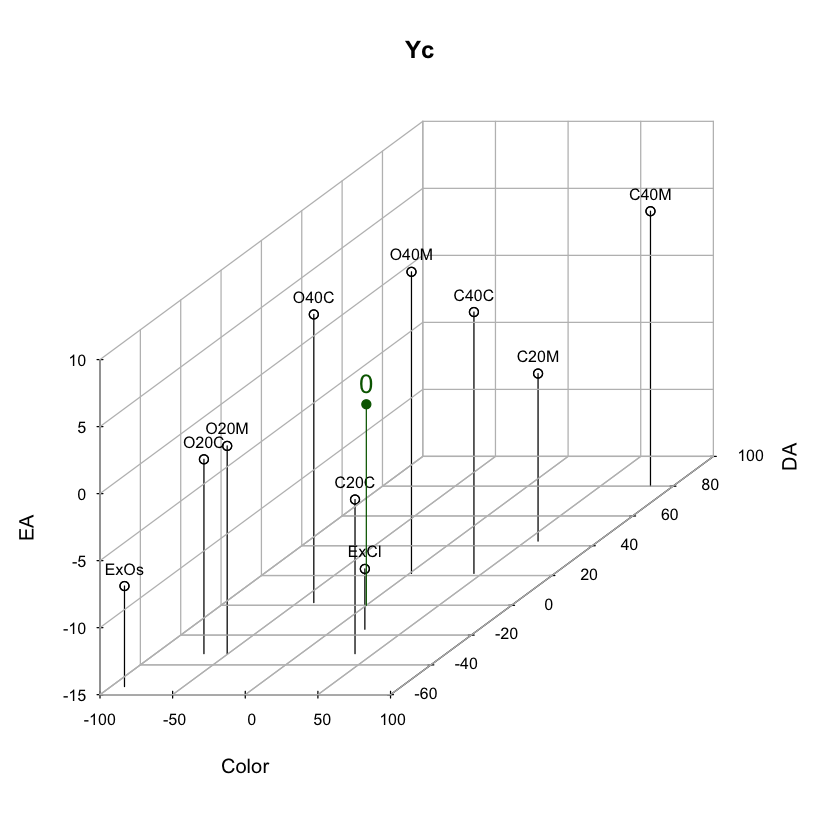

In [27]:
# cálculo de la matriz de datos centrados y representación en 3D
Yc<-scale(Y,scale=FALSE)   #calculo
attr(Yc,"scaled:center")->g  #la función scale muestra el centro de gravedad
t(rbind(Yc,g))
# grafica de datos centrados
par(las=1);
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="black",
	               box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy", "xz", "yz"));
text (Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,
	  col="black",pos=3);
Yc3D$points3d(t(c(0 ,0 ,0)),pch=19 , col ="darkgreen",type = "h");
text(Yc3D$xyz.convert (t(c(0 ,0 ,0))),labels ="0",pos =3, 
     col ="darkgreen",cex =1.3);


#### **Inercia de la nube de puntos**
$$
Inercia(N_n) = \sum\limits_{i=1}^{n}{p_i
d^2(i,\mathbf{g})}
$$
$$
  Inercia(N_n) =
 \sum\limits_{i=1}^{n} p_i\sum\limits_{j=1}^{p}y_{{_C}_{ij}}^2 =
  \sum\limits_{j=1}^{p}\sum\limits_{i=1}^{n} p_i y_{{_C}_{ij}}^2
 = \sum\limits_{j=1}^{p}\sigma_j^2 
$$

#### **Matriz de varianzas y covarianzas**
Si los pesos de los individuos son iguales: $p_i=\frac{1}{n}$
$$
  \mathbf{V}=\dfrac{1}{n} \mathbf{Y'_C}\mathbf{Y_C} $$ 
La inercia de la nube de puntos es también: $Inercia(N_n) = traza(\mathbf{V})$



In [28]:
V<-covfacwt(Y) # función de ade4 para calcular V dividiendo por n
round(V,0)

,Color,DA,EA
Color,3106,1738,61
DA,1738,1560,129
EA,61,129,33


#### **Cálculo y gráfica 3D de la matriz de datos estandarizados X**

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C,g,Des
Color,0.36,1.44,0.75,0.99,0.63,-1.54,0.02,-0.66,-0.86,-1.14,276.70,58.7
DA,-0.39,1.92,0.51,1.04,-0.78,-1.31,0.51,0.04,-0.78,-0.78,401.16,41.6
EA,-1.72,0.90,0.74,-0.41,-0.57,-1.23,1.23,1.07,0.08,-0.08,35.50,6.1


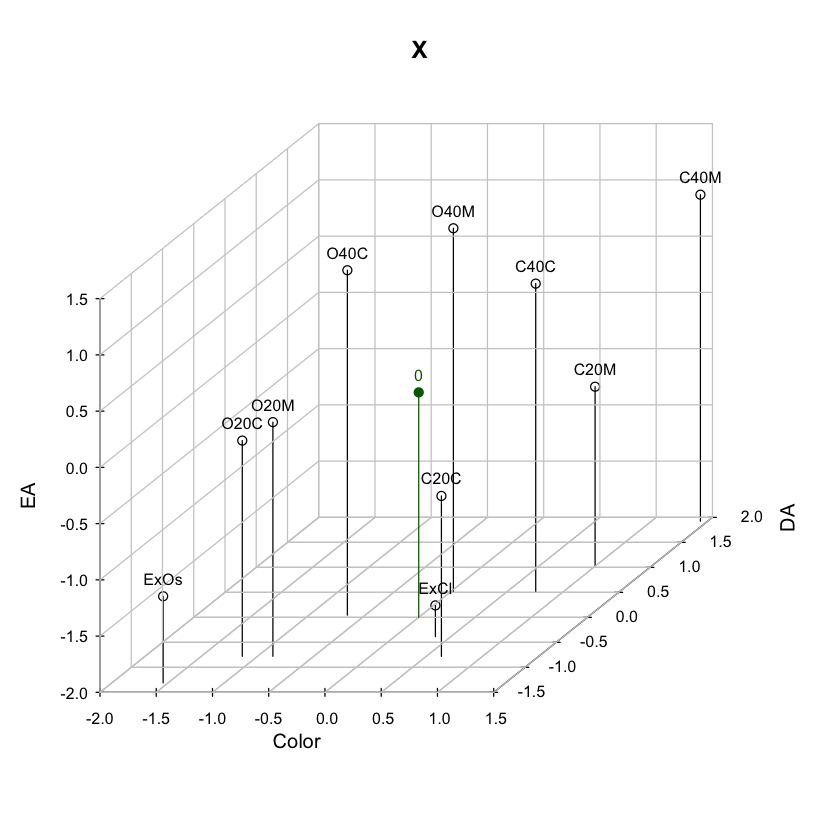

In [29]:
# Cálculo de matriz X estandarizada
X<-scale(Y)
# aquí la función scale calcula la media y la desviación estándar
# las varianzas que calcula R es la muestral: se divide por n-1
round(attr(X,"scaled:scale"),1)->Des
# X transpuesta + g + Des
t(round(rbind(X,g,Des),2))
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(X,main="X",type ="h",box=FALSE,asp=1); 
X3D$points3d(Yc,pch=1);
addgrids3d(X,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(X),labels=rownames(X),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### Gráfica 3D para rotar. No ejecute aquí el siguiente código. Cópielo y ejecútelo en la consola de R


[Volver al inicio](#Contenido)

## **Búsqueda del eje de mayor inercia proyectada (varianza)**

El valor de la proyección de un individuo *i* sobre el eje generado por un vector $\mathbf{u}$ unitario es: $<\mathbf{x}_i,\mathbf{u}>=\mathbf{x}_i'\mathbf{u}$.

El individuo $i$ suma a la inercia proyectada (varianza) sobre el eje $\mathbf{u}$ la cantidad $\dfrac{1}{n} (\mathbf{x}_i'\mathbf{u})^2$.

La inercia total de la nube de individuos (varianza), proyectada sobre el eje $\mathbf{u}$ es entonces:
$$
\sum_{i=1}^{n} \frac{1}{n} (\mathbf{x}_i'\mathbf{u})^2 =
\frac{1}{n}(\mathbf{Xu})'\mathbf{Xu} = \mathbf{u'}\frac{1}{n}\mathbf{X'Xu}
$$



<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/uProyeccion.png?raw=TRUE" alt="Proyección sobre u" width="300" height="400">
<center>

Geométricamente la búsqueda del eje equivale a rotarlo hasta que la suma de cuadrados de las proyecciones de los puntos sobre él  sea máxima. Cuando los puntos tienen pesos iguales el eje coincide con la dirección donde la nube de puntos esté más alargada. Se puede observar que cualquier vector que esté sobre la recta es solución y por lo tanto se introduce la condición de que el vector sea unitario: $\mathbf{u'u}=1$, con lo cual las soluciones son dos, ya que si $\mathbf{u}$ es solución $-\mathbf{u}$ también lo es. Cómo es una optimización se pueden tener diferentes procedimientos para hacerlo. En Álgebra lineal se obtiene una solución analítica utilizando la técnica de multiplicadores de Lagrange.

<center>
<img src="https://images3.programmerclick.com/611/1d/1da21c4ce8bb7e0d68f27776d42a0c13.gif" alt="Linea proyeccion" width="400" height="500">
<center>

La solución es uno de los dos vectores propios unitarios asociados al valor propio más grande de la matriz:
$$
\dfrac{1}{n}\mathbf{X'X}
$$
que es la matriz de correlaciones. Una pareja (valor propio más grande, vector propio) se denota 
$(\lambda_1 ,\mathbf{u}_1)$

La matriz de correlaciones, cuando $n\geq p$, generalmente tiene $p$ valores propios, los cuales se ordenan de mayor a menor:
$$
\lambda_1 \geq \lambda_2 \geq \cdots \lambda_s \geq \cdots \lambda_S \geq \cdots \lambda_p
$$

Los
$p$ vectores propios
 $\{\mathbf{u_1},\cdots,\mathbf{u_s},\cdots,\mathbf{u_S} \cdots,\mathbf{u_p} \}$
generan un sistema de nuevos ejes, denominados componentes principales, que son variables, calculadas como combinaciones lineales (sumas ponderadas de las $p$ variables originales), se notan como $F_s, s=1,2 \cdots p$, que se pueden entender como nuevas variables y como vectores de dimensión $n \times 1$, cada uno con los valores de la nueva variable. Los  $p$ vectores $\mathbf{u}_s$ conforman una nueva base para soportar la nube de puntos.

#### Rotación de ejes o cambio de base

In [30]:
acp=dudi.pca(Y,scannf=FALSE,nf=3)
cat("Tabla en nuevos ejes")
F=acp$li;round(t(F),2)

Tabla en nuevos ejes

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Axis1,-0.89,2.68,1.18,1.14,-0.44,-2.47,0.98,0.15,-1.04,-1.29
Axis2,-1.68,-0.22,0.15,-1.02,-0.82,-0.04,1.01,1.31,0.65,0.67
Axis3,-0.11,-0.29,0.33,-0.35,0.79,-0.38,0.06,-0.05,0.11,-0.12


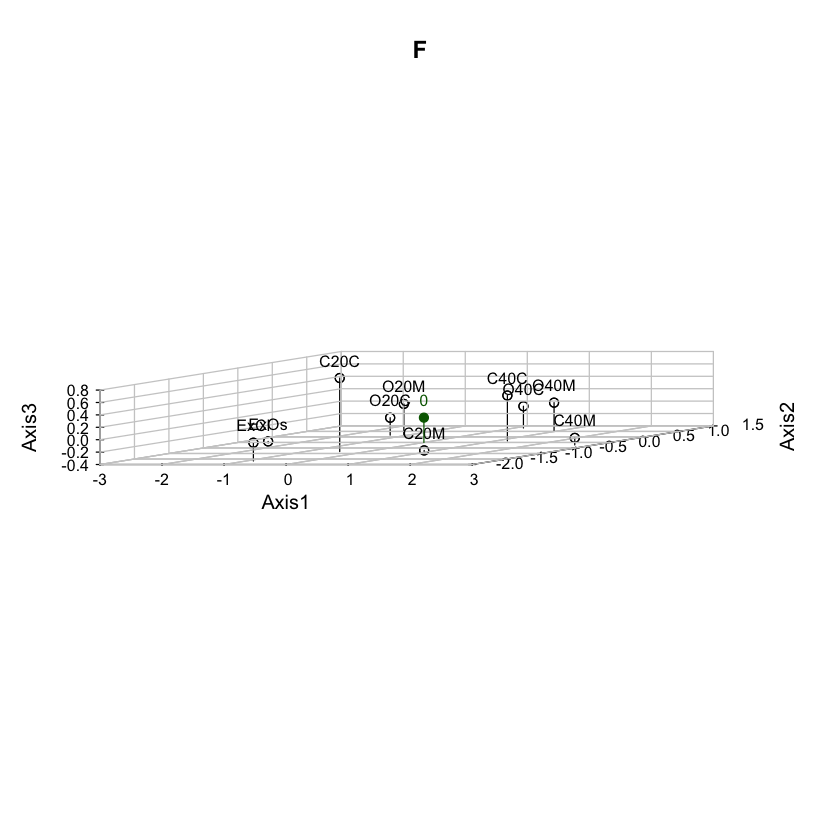

In [31]:
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(F,main="F",type ="h",box=FALSE,asp=1); 
X3D$points3d(F,pch=1);
addgrids3d(F,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(F),labels=rownames(F),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);

#### Gráfica 3D para rotar. No ejecute aquí el siguiente código. Cópielo y ejecútelo en la consola de R


In [39]:
##=======================================
## Ejecute este código en la consola de R
##==============================
#library(FactoClass)
#data(cafe)
#acp=dudi.pca(cafe[1:10,1:3],scannf=FALSE,nf=3)
#F=acp$li
#library(rgl)
#plot3d(F,aspect = c(12,6,1))
#grid3d(c("x", "y+", "z"))
#text3d(F, texts=row.names(X))
#g=c(0,0,0)
#text3d(g,texts="g",col="red")
##========================================

#### Mejor plano de proyección

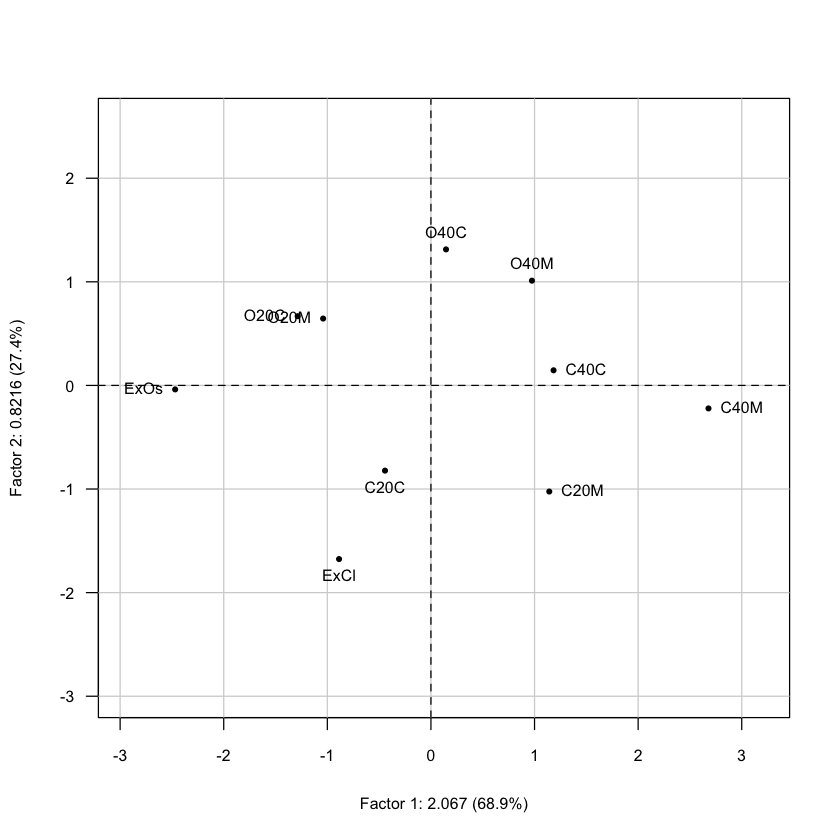

In [32]:
plot(acp,Tcol=FALSE,asp=1)

Plano 1-3

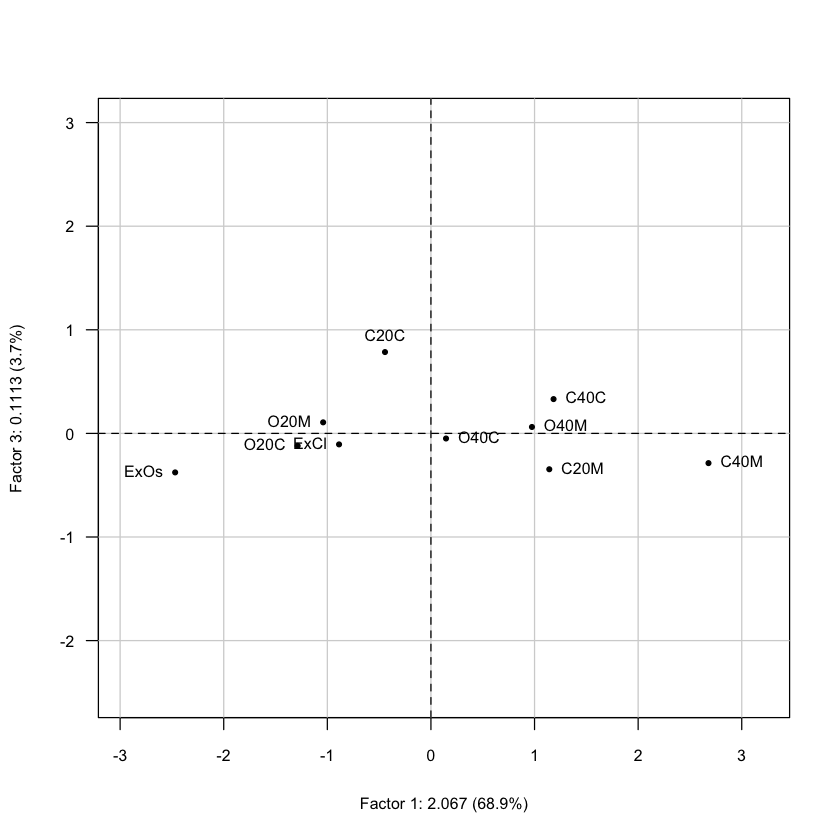

In [33]:
plot(acp,1,3,Tcol=FALSE,asp=1)

[Volver al inicio](#Contenido)

# **Nube de variables**

La matriz de datos $\mathbf{Y}$ y sus transformaciones tienen una interpretación dual a la de los individuos: la nube de variables. Ahora los ejes son los individuos y las variables son los puntos. En el ejemplo café, se tienen entonces, tres puntos variable en $\mathbf{R}^{10}$.


In [34]:
Y

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36


En el espacio de las variables los pesos están en la diagonal de $\mathbf{I}_p$, es decir son uno para todas las variables, y la métrica (matriz que define el producto interno) es la matriz diagonal con los pesos de los individuos, es decir $\frac{1}{n}\mathbf{I}_n$, para el caso de pesos iguales. Con esta métrica las estadísticas de resumen y las transformaciones de la matriz desde $\mathbf{Y}$ hasta la $\mathbf{X}$ tienen significado geométrico, lo que resumo a continuación (ver el capítulo 3 del [libro Estadística descriptiva multivariada](https://bit.ly/3mD9rEY)). 

- Media de una variable $j$: 
$$
\bar{Y}_j = \frac{1}{n} \sum_{i=1}^{n} y_{ij} = 
\frac{1}{n}\mathbf{Y'}_j \mathbf{1_{_n}} =
\left<  \mathbf{Y}_j,\mathbf{1_{_n}} \right>_{\frac{1}{n}\mathbf{I}_n} 
$$

- Centrado de una variable
$$
\mathbf{Y}_{C_j}=\mathbf{Y}_j - \overline{Y} \mathbf{1}_n 
$$
donde $\mathbf{1}_n$ es un vetor de $n$ unos ($n \times 1$).

<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/EDMvariables.png?raw=TRUE" alt="Significado de la media y el centrado de una variable" width="400" height="500">
<center>

- Varianza

$$
var(Y_j) = \frac{1}{n} \sum_{i=1}^n (y_{ij} - \bar{Y}_j)^2 = 
\left<\mathbf{Y_{C}}_j,\mathbf{Y_{C}}_j\right>_{\frac{1}{n}\mathbf{I}_n}
$$

- Covarianza

$$
 cov(Y_j,Y_{k}) = \frac{1}{n} \sum_{i=1}^n (y_{ij} - \bar{Y}_j)(y_{ik} - \bar{Y}_{k}) = 
\left<\mathbf{Y_{C}}_j,\mathbf{Y_{C}}_{k}\right>_{\frac{1}{n}\mathbf{I}_n}
$$

- Significado del reducido

$$
\mathbf{X_j}=
\dfrac{1}{\sigma_j}\mathbf{Y}_{C_j}
$$

    + Varianza de una variable centrada y reducida:
    
$$
<\mathbf{X_j,X_j}>_{\frac{1}{n}\mathbf{I_n}}=\mathbf{X_j^{'}}\left(\frac{1}{n}\mathbf{I}_n\right)\mathbf{X}_j=
\frac{1}{n}\mathbf{X_j^{'}X_j}=1
$$ 
    Las variables estandarizadas se pueden ver como flechas que terminan en el cascarón hiperesféricon de radio 1 y centro origen.
    
 - Correlación

$$
cor(Y_j,Y_{k}) = \frac{cov(Y_j,Y_{k})}{\sigma_j \sigma_{k}}=
\frac{ <\mathbf{Y_{C_j},Y_{C_k}}>_{\frac{1}{n}\mathbf{I_n}}}{\| \mathbf{Y_{C_j}} \|_{\frac{1}{n}\mathbf{I_n}} \|\mathbf{Y_{C_k}} \|_{\frac{1}{n}\mathbf{I_n}}}=
<\mathbf{X_j,X_{k}}>_{\frac{1}{n}\mathbf{I_n}}
$$

    + El espacio de las variables de un ACP normado es una representación de la matriz de correlaciones.
    
    + Si entre dos vectores variables hay un ángulo pequeño, su correlación es alta; mientras dos vectores variables ortogonales indican que las variables no están correlacionadas.



**Búsqueda de los nuevos ejes**

El procedimento para encontrar los nuevos ejes es el mismo que en el de los individuos.

<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/EDMvariablesprimerEjeColor.png?raw=TRUE" alt="Búsqueda de los nuevos ejes en el espacio de las variables" width="300" height="400">
<center>

Solución con vectores propios $\frac{1}{n}\mathbf{I}_n$ unitarios asociados a los $\mu$ valores propios de la matriz:
$$
\frac{1}{n}\mathbf{XX'}
$$

- Esta matriz es $n \times n$, pero solo tiene $p$ valores propios mayores que 0 (se supone que $n \geq p$)

- Los dos espacios están relacionados.

[Volver al inicio](#Contenido)

# Relaciones entre los espacios de individuos y de variables

- La matriz  $$\frac{1}{n}\mathbf{XX'}$$ tiene $p$ valores propios, que son iguales a los valores propios de $$\frac{1}{n}\mathbf{X'X}$$ y los restantes $n - p$ valores propios son 0. 

- El vector coordenadas de los $n$ individuos sobre el eje $s$  $\mathbf{F}_s$, es un vector propio de $$\frac{1}{n}\mathbf{XX'}$$.

- La varianza de $\mathbf{F}_s$ es $\lambda_s$, y por lo tanto, el vector propio $\mathbf{v}_s$ se puede calcular mediante:  $$\mathbf{v}_s=\frac{1}{\sqrt{\lambda_s}}\mathbf{F}_s$$.

-  $\mathbf{G}_s$, vector de coordenadas de las $p$ variables sobre el eje $s$, es un vector propio de $$\frac{1}{n}\mathbf{X'X}$$.

- La varianza de $\mathbf{G}_s$ es $\lambda_s$, y por lo tanto, se puede obtener mediante:   $$\mathbf{G}_s =\sqrt{\lambda_s}\mathbf{u}_s$$.

- En el ACP normado, las coordenadas de $\mathbf{G}_s$ son las correlaciones entre las variables y el eje $s$: $cor(Y_j,F_s)$.


### **Círculo de correlaciones del ejemplo café**

In [35]:
s.corcircle(acpcafe$co)
# matriz de correlaciones
round(cor(Y),2)
s.corcircle(acpcafe$co,fullcircle=FALSE)


ERROR: Error in data.frame(dfxy): object 'acpcafe' not found


In [ ]:
as.dist(round(cor(Y),2))

[Volver al inicio](#Contenido)

# Ayudas para la interpretación
Es importante evitar malas lecturas de los ejes y planos factoriales. En las ayudas para la interpretación se encuentran índices para evitarlo. Otras ayudas orientan la lectura de las gráficas y la toma de decisiones metodológicas. A continuación se presentan las del ejemplo café y se recomienda leer sobre ellas en el capítulo 3 del libro EDM


In [ ]:
ayuacpcafe<-inertia(acpcafe,T,T) # inertia.dudi es una función de ade4


#### Valores propios


In [ ]:
round(ayuacpcafe$tot.inertia,2)
barplot(ayuacpcafe$tot.inertia$inertia[3:1],hor=TRUE)
abline(h=1,col="darkgreen")

#### Coordenadas y ayudas para las variables

In [ ]:
names(ayuacpcafe)

In [ ]:
attach(ayuacpcafe)
round(cbind(acpcafe$co,Ca=col.abs,Cos2=col.rel,conInercia=col.contrib),2)
detach(ayuacpcafe)

#### Coordenadas y ayudas para los cafés

In [ ]:
attach(ayuacpcafe)
round(cbind(acpcafe$li,Ca=row.abs,Cos2=row.rel,conInercia=row.contrib),2)
detach(ayuacpcafe)

[Volver al inicio](#Contenido)

# Proyección de elementos suplementarios o ilustrativos

Sobre los planos factoriales de las variables se pueden proyectar variables continuas que no participaron en el análisis, lo que enriquece los análisis.

En los planos factoriales de los individuos se pueden proyectar: individuos suplementarios, variables cualitativas, y los antiguos ejes unitarios para las variables activas que estén bien representadas.

Ver capítulos 3 y 4 del libro EDM.

# FIN

[Volver al inicio](#Contenido)